In [65]:
import pandas as pd 
import numpy as np 
import re


# DATA

In [66]:
df1 = pd.read_csv('train.csv')
df1.shape

(54937, 11)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54937 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     54937 non-null  int64 
 1   Make                   54937 non-null  object
 2   Vehicle Class          54398 non-null  object
 3   Engine Size(L)         53544 non-null  object
 4   Cylinders              53739 non-null  object
 5   Transmission           54527 non-null  object
 6   Fuel Type              54391 non-null  object
 7   Fuel Consumption City  53369 non-null  object
 8   Fuel Consumption Hwy   53236 non-null  object
 9   Fuel Consumption Comb  53263 non-null  object
 10  CO2 Emissions(g/km)    54937 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.6+ MB


Dataset Description
This dataset was gathered and modified from open.canada.ca

Transmission
- A = Automatic
- AM = Automated manual
- AS = Automatic with select shift
- AV = Continuously variable
- M = Manual
- 3 - 10 = Number of gears

Fuel type
- X = Regular gasoline
- Z = Premium gasoline
- D = Diesel
- E = Ethanol (E85)
- N = Natural gas

Fuel Consumption City
- This column displays the vehicle's fuel consumption specifically during city driving conditions.

Fuel Consumption Hwy
- This column indicates the vehicle's fuel consumption under highway driving conditions.

Fuel Consumption Comb
- This column showcases the combined fuel consumption rating, calculated as a blend of 55% city driving and 45% highway driving.

CO2 Emissions
- The tailpipe emissions of carbon dioxide (in grams per kilometers) for combined city and highway driving


# PRE-PROCESSING DATA

## DATA CLEANING

### MISSING VALUE HANDLING

In [68]:
df1.isnull().sum()

Id                          0
Make                        0
Vehicle Class             539
Engine Size(L)           1393
Cylinders                1198
Transmission              410
Fuel Type                 546
Fuel Consumption City    1568
Fuel Consumption Hwy     1701
Fuel Consumption Comb    1674
CO2 Emissions(g/km)         0
dtype: int64

In [69]:
df2 = df1.dropna()
df2.shape

(46519, 11)

In [70]:
df2.isnull().sum()


Id                       0
Make                     0
Vehicle Class            0
Engine Size(L)           0
Cylinders                0
Transmission             0
Fuel Type                0
Fuel Consumption City    0
Fuel Consumption Hwy     0
Fuel Consumption Comb    0
CO2 Emissions(g/km)      0
dtype: int64

### DUPLICATED DATA HANDLING

In [71]:
df2.duplicated().sum()

0

## DATA TRANSFORMATION

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46519 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     46519 non-null  int64 
 1   Make                   46519 non-null  object
 2   Vehicle Class          46519 non-null  object
 3   Engine Size(L)         46519 non-null  object
 4   Cylinders              46519 non-null  object
 5   Transmission           46519 non-null  object
 6   Fuel Type              46519 non-null  object
 7   Fuel Consumption City  46519 non-null  object
 8   Fuel Consumption Hwy   46519 non-null  object
 9   Fuel Consumption Comb  46519 non-null  object
 10  CO2 Emissions(g/km)    46519 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 4.3+ MB


Kita tidak akan membahas 'Make' and 'Vichle Class'

In [73]:
df3 = df2.drop(['Make', 'Vehicle Class'], axis='columns')

In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46519 entries, 0 to 54936
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     46519 non-null  int64 
 1   Engine Size(L)         46519 non-null  object
 2   Cylinders              46519 non-null  object
 3   Transmission           46519 non-null  object
 4   Fuel Type              46519 non-null  object
 5   Fuel Consumption City  46519 non-null  object
 6   Fuel Consumption Hwy   46519 non-null  object
 7   Fuel Consumption Comb  46519 non-null  object
 8   CO2 Emissions(g/km)    46519 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 3.5+ MB


#### 1. Engine Size(L)

In [75]:
df4 = df3.copy()
df4.shape

(46519, 9)

In [76]:
df4['Engine Size(L)'].unique()

array(['1.5', 'not-available', '2.0', 'unknown', '1.8', '2.4', '3.5',
       '2.7', '1.6', '1.2', '2.5', '3.2', '5.0', '8.4', '1.4', '3.8',
       'unestablished', '4.4', '3.0', '3.6', '6.2', '5.7', 'na', '5.2',
       '6.4', '2.3', 'not-recorded', '3.3', '5.3', 'missing', '6.5',
       '1.0', '4.0', '3.7', '1.3', 'unspecified', '4.6', '4.8', '5.6',
       '2.8', '6.0', '4.2', '4.3', '6.6', '5.4', '3.4', '5.8', '6.8',
       '2.2'], dtype=object)

In [77]:
df4['Engine Size(L)'] = df4['Engine Size(L)'].replace({'not-available':-1,
                               'unknown':-1,
                               'unestablished':-1,
                               'not-recorded':-1,
                               'missing':-1,
                               'unspecified':-1,
                               'na':-1})
df4['Engine Size(L)'] = df4['Engine Size(L)'].apply(lambda x: float(x))
df4 = df4[df4['Engine Size(L)'] > 0]

In [78]:
df4.shape

(43168, 9)

#### 2. Cylinders

In [79]:
df5 = df4.copy()
df5.shape

(43168, 9)

In [80]:
df5['Cylinders'].value_counts()

Cylinders
4.0              21176
6.0              12123
8.0               6321
not-recorded       648
unestablished      353
missing            342
na                 337
unspecified        328
not-available      324
unknown            310
3.0                279
12.0               232
10.0               222
5.0                173
Name: count, dtype: int64

In [81]:
df5['Cylinders'] = df5['Cylinders'].replace({'not-available':-1,
                               'unknown':-1,
                               'unestablished':-1,
                               'not-recorded':-1,
                               'missing':-1,
                               'unspecified':-1,
                               'na':-1})
df5['Cylinders'] = df5['Cylinders'].apply(lambda x: float(x))
df5 = df5[df5['Cylinders'] > 0]

In [82]:
df5.shape

(40526, 9)

#### 3. Transmission

In [83]:
df6 = df5.copy()
df6.shape

(40526, 9)

In [84]:
df6['Transmission'].value_counts()

Transmission
AS6              9007
AS8              6181
M6               5806
A6               3880
AV               2351
A8               2073
M5               1533
AS10             1367
AM7              1107
A9               1067
AV6               934
AV7               846
AM6               784
A5                700
AS9               511
A4                429
AV8               261
AS7               234
AS5               208
not-recorded      190
A10               114
na                113
AM8               111
unspecified       108
not-available     106
AV10               99
unknown            99
missing            97
unestablished      93
M7                 77
AM9                24
A7                 16
Name: count, dtype: int64

In [85]:
df6['Transmission'][0]

'AV8'

In [86]:
x = re.findall('\d{1}',df6['Transmission'][0] )
x

['8']

In [240]:
df7 = df6.copy()

In [241]:
df7[['Transmission_code', 'Gear']] = df7['Transmission'].str.extract(r'([A-Za-z]+)(\d+)', expand=True)

# If your column contains NaN values, you can fill them with empty strings or any other value
df7[['Transmission_code', 'Gear']] = df7[['Transmission_code', 'Gear']].fillna('')

# Convert the 'Gear' column to integers
df7['Gear'] = pd.to_numeric(df7['Gear'], errors='coerce').astype('Int64')


In [242]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40526 entries, 0 to 54936
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     40526 non-null  int64  
 1   Engine Size(L)         40526 non-null  float64
 2   Cylinders              40526 non-null  float64
 3   Transmission           40526 non-null  object 
 4   Fuel Type              40526 non-null  object 
 5   Fuel Consumption City  40526 non-null  object 
 6   Fuel Consumption Hwy   40526 non-null  object 
 7   Fuel Consumption Comb  40526 non-null  object 
 8   CO2 Emissions(g/km)    40526 non-null  int64  
 9   Transmission_code      40526 non-null  object 
 10  Gear                   37369 non-null  Int64  
dtypes: Int64(1), float64(2), int64(2), object(6)
memory usage: 4.8+ MB


Encode the 'Transmission_code'

In [243]:
df7['Transmission_code'].unique()

array(['AV', 'AS', 'M', 'A', '', 'AM'], dtype=object)

In [244]:
df7['Transmission_value'] = -1

In [245]:
df7['Transmission_value'] = df7['Transmission_code'].replace({'AV':3, 'AS':2, 'M':0, 'A':4, '':-1, 'AM':1})
df8 = df7[df7['Transmission_value'] >= 0]
df8 = df8.drop(['Transmission','Transmission_code'], axis=1)

In [246]:
# # Convert the 'City' column to dummy variables
# df8_dummies = pd.get_dummies(df7['Transmission_code'], prefix='T')
# df8_dummies = df8_dummies.astype(int)

# # Concatenate the dummy variables with the original DataFrame
# df8 = pd.concat([df7, df8_dummies], axis=1)

# # Drop the original 'Transmission_code' column
# df8 = df8.drop(['Transmission','Transmission_code','T_'], axis=1)

In [247]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37369 entries, 0 to 54936
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     37369 non-null  int64  
 1   Engine Size(L)         37369 non-null  float64
 2   Cylinders              37369 non-null  float64
 3   Fuel Type              37369 non-null  object 
 4   Fuel Consumption City  37369 non-null  object 
 5   Fuel Consumption Hwy   37369 non-null  object 
 6   Fuel Consumption Comb  37369 non-null  object 
 7   CO2 Emissions(g/km)    37369 non-null  int64  
 8   Gear                   37369 non-null  Int64  
 9   Transmission_value     37369 non-null  int64  
dtypes: Int64(1), float64(2), int64(3), object(4)
memory usage: 3.2+ MB


#### 4. Fuel Type

In [248]:
df9 = df8.copy()
df9.shape

(37369, 10)

In [249]:
df9['Fuel Type'].unique()

array(['X', 'Z', 'E', 'not-recorded', 'D', 'unspecified', 'unknown',
       'not-available', 'na', 'missing', 'unestablished', 'N'],
      dtype=object)

In [250]:
df9['Fuel Type'] = df9['Fuel Type'].replace({'not-available':None,
                               'unknown':None,
                               'unestablished':None,
                               'not-recorded':None,
                               'missing':None,
                               'unspecified':None,
                               'na':None})

In [251]:
df9 = df9.dropna()

In [252]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36421 entries, 0 to 54936
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     36421 non-null  int64  
 1   Engine Size(L)         36421 non-null  float64
 2   Cylinders              36421 non-null  float64
 3   Fuel Type              36421 non-null  object 
 4   Fuel Consumption City  36421 non-null  object 
 5   Fuel Consumption Hwy   36421 non-null  object 
 6   Fuel Consumption Comb  36421 non-null  object 
 7   CO2 Emissions(g/km)    36421 non-null  int64  
 8   Gear                   36421 non-null  Int64  
 9   Transmission_value     36421 non-null  int64  
dtypes: Int64(1), float64(2), int64(3), object(4)
memory usage: 3.1+ MB


Mengganti nilai 
- X = Regular gasoline : 2 
- Z = Premium gasoline : 3
- D = Diesel : 0
- E = Ethanol (E85) : 4
- N = Natural gas : 1

In [253]:
df9['Fuel Type'] = df9['Fuel Type'].replace({'D':0,
                               'N':1,
                               'X':2,
                               'Z':3,
                               'E':4})

In [254]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36421 entries, 0 to 54936
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     36421 non-null  int64  
 1   Engine Size(L)         36421 non-null  float64
 2   Cylinders              36421 non-null  float64
 3   Fuel Type              36421 non-null  int64  
 4   Fuel Consumption City  36421 non-null  object 
 5   Fuel Consumption Hwy   36421 non-null  object 
 6   Fuel Consumption Comb  36421 non-null  object 
 7   CO2 Emissions(g/km)    36421 non-null  int64  
 8   Gear                   36421 non-null  Int64  
 9   Transmission_value     36421 non-null  int64  
dtypes: Int64(1), float64(2), int64(4), object(3)
memory usage: 3.1+ MB


#### 5. Fuel Consumption Comb

In [255]:
df9['Fuel Consumption Comb']

0                   0.98 L/10km
2                31.76 mpg Imp.
4        8.01 liters per 100 km
5                  9.81 L/100km
7                21.28 MPG (AS)
                  ...          
54932            22.39 MPG (AS)
54933            14.41 MPG (AS)
54934            15.63 L/100 km
54935            14.52 L/100 km
54936             not-available
Name: Fuel Consumption Comb, Length: 36421, dtype: object

In [256]:
df10 = df9.copy()
df10.shape

(36421, 10)

In [257]:
df10['Fuel Consumption Comb'] = df10['Fuel Consumption Comb'].replace({'not-available':None,
                               'unknown':None,
                               'unestablished':None,
                               'not-recorded':None,
                               'missing':None,
                               'unspecified':None,
                               'na':None,
                               'zero':'0'})

In [258]:
df10 = df10.dropna()

In [259]:
df10['Fuel Consumption Comb'] = df10['Fuel Consumption Comb'].str.replace(' ','')
df10['Fuel Consumption Comb']

0                0.98L/10km
2              31.76mpgImp.
4        8.01litersper100km
5               9.81L/100km
7              21.28MPG(AS)
                ...        
54931           11.52kmperL
54932          22.39MPG(AS)
54933          14.41MPG(AS)
54934          15.63L/100km
54935          14.52L/100km
Name: Fuel Consumption Comb, Length: 36112, dtype: object

In [260]:
# Regular expression pattern to extract floating-point numbers with optional unit
float_pattern = r'([-+]?\d*\.\d+|\d+)(.*)?'

# Extracting floating-point numbers and units
df10[['Value', 'Unit']] = df10['Fuel Consumption Comb'].str.extract(float_pattern)

# Handling NaN values in the 'Unit' column
df10['Unit'] = df10['Unit'].fillna('')
df10['Value'] = df10['Value'].astype(float)

In [261]:
df10[['Fuel Consumption Comb','Value','Unit']].head()

,Fuel Consumption Comb,Value,Unit
0,0.98L/10km,0.98,L/10km
2,31.76mpgImp.,31.76,mpgImp.
4,8.01litersper100km,8.01,litersper100km
5,9.81L/100km,9.81,L/100km
7,21.28MPG(AS),21.28,MPG(AS)


Sekarang kita akan menentukan nilai yang sesuai dan seragam dari 'Fuel Consumption Comb'

In [262]:
df11 = df10.copy()

In [263]:
df11['Unit'].unique()

array(['L/10km', 'mpgImp.', 'litersper100km', 'L/100km', 'MPG(AS)',
       'kmperL', 'km/L', ''], dtype=object)

In [264]:
df11.loc[(df11['Unit'] == '') & (df11['Value'] != 0), 'Value'].sum()

0.0

Kita akan menyeragamkan menjadi 'L/km'
- (x L/10km) -> 10x
- (x L/100km) | (litersper100km) -> 10x
- (x km/L) | (kmperL) -> 1/x
- (mpgImp.) -> (1/x) * (1/0.425144) 
- (MPG(AS)) -> (1/x) * (1/0.354006189)


In [265]:
df11['Fuel Consumption Comb (L/km)'] = 0

In [266]:
4.54609 / 1.60934

2.8248163843563203

In [267]:
1/0.354006189

2.824809370776283

In [268]:
1/ (31.76 * 2.824809370776283)

0.011146290585642317

In [269]:
df11 = df11.reset_index(drop=True)

In [270]:
for i, (value, unit) in enumerate(zip(df11['Value'], df11['Unit'])):
    if unit == 'L/10km':
        df11['Fuel Consumption Comb (L/km)'][i] = value/10
    elif (unit == 'L/100km') | (unit == 'litersper100km'):
        df11['Fuel Consumption Comb (L/km)'][i] = value/100
    elif (unit == 'km/L') | (unit == 'kmperL'):
        df11['Fuel Consumption Comb (L/km)'][i] = 1/value
    elif unit == 'mpgImp.':
        df11['Fuel Consumption Comb (L/km)'][i] =  2.82481/value
    elif unit == 'MPG(AS)':
        df11['Fuel Consumption Comb (L/km)'][i] = 2.35215/value
    

C:\Users\sabri\AppData\Local\Temp\ipykernel_11100\1661913402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Fuel Consumption Comb (L/km)'][i] = value/10
C:\Users\sabri\AppData\Local\Temp\ipykernel_11100\1661913402.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.098' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df11['Fuel Consumption Comb (L/km)'][i] = value/10


In [271]:
df11.head()

,Id,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,CO2 Emissions(g/km),Gear,Transmission_value,Value,Unit,Fuel Consumption Comb (L/km)
0,1,1.5,4.0,2,8.40 km/L,0.72 L/10km,0.98L/10km,208,8,3,0.98,L/10km,0.098000
1,3,2.0,4.0,2,9.80 km/L,38.70 mpg Imp.,31.76mpgImp.,170,6,2,31.76,mpgImp.,0.088942
2,5,1.8,4.0,2,8.10 L/100km,35.76 mpg Imp.,8.01litersper100km,180,6,0,8.01,litersper100km,0.080100
3,6,2.4,4.0,2,8.85 km per L,29.40 MPG (AS),9.81L/100km,216,6,4,9.81,L/100km,0.098100
4,8,3.5,6.0,2,19.60 MPG (AS),10.10 km/L,21.28MPG(AS),221,6,2,21.28,MPG(AS),0.110533


In [272]:
df11.isnull().sum()

Id                              0
Engine Size(L)                  0
Cylinders                       0
Fuel Type                       0
Fuel Consumption City           0
Fuel Consumption Hwy            0
Fuel Consumption Comb           0
CO2 Emissions(g/km)             0
Gear                            0
Transmission_value              0
Value                           0
Unit                            0
Fuel Consumption Comb (L/km)    0
dtype: int64

In [273]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36112 entries, 0 to 36111
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id                            36112 non-null  int64  
 1   Engine Size(L)                36112 non-null  float64
 2   Cylinders                     36112 non-null  float64
 3   Fuel Type                     36112 non-null  int64  
 4   Fuel Consumption City         36112 non-null  object 
 5   Fuel Consumption Hwy          36112 non-null  object 
 6   Fuel Consumption Comb         36112 non-null  object 
 7   CO2 Emissions(g/km)           36112 non-null  int64  
 8   Gear                          36112 non-null  Int64  
 9   Transmission_value            36112 non-null  int64  
 10  Value                         36112 non-null  float64
 11  Unit                          36112 non-null  object 
 12  Fuel Consumption Comb (L/km)  36112 non-null  float64
dtypes

### Data transformation sudah selesai, selanjutnya kolom kolom yang sudah tidak berguna akan dihapus

In [274]:
columns = ['Id', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb', 'Value', 'Unit']
df12 = df11.drop(columns, axis='columns')

In [275]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36112 entries, 0 to 36111
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Engine Size(L)                36112 non-null  float64
 1   Cylinders                     36112 non-null  float64
 2   Fuel Type                     36112 non-null  int64  
 3   CO2 Emissions(g/km)           36112 non-null  int64  
 4   Gear                          36112 non-null  Int64  
 5   Transmission_value            36112 non-null  int64  
 6   Fuel Consumption Comb (L/km)  36112 non-null  float64
dtypes: Int64(1), float64(3), int64(3)
memory usage: 2.0 MB


### OUTLIER HANDLING

In [276]:
df12.describe()

,Engine Size(L),Cylinders,Fuel Type,CO2 Emissions(g/km),Gear,Transmission_value,Fuel Consumption Comb (L/km)
count,36112.000000,36112.000000,36112.000000,36112.000000,36112.0,36112.000000,36112.000000
mean,3.038004,5.368659,2.371400,250.910362,6.732665,2.049817,0.110785
std,1.318246,1.623017,0.683596,67.016866,1.27409,1.336135,0.031384
min,1.000000,3.000000,0.000000,96.000000,4.0,0.000000,0.000000
25%,2.000000,4.000000,2.000000,202.000000,6.0,1.000000,0.089600
50%,2.500000,4.000000,2.000000,236.000000,6.0,2.000000,0.104600
75%,3.600000,6.000000,3.000000,295.000000,8.0,3.000000,0.131306
max,8.400000,12.000000,4.000000,522.000000,10.0,4.000000,0.253165


Berdasarkan deskripsi diatas dapat langsung dilihat pada kolom 'Fuel Consumption Comb (L/km)' nilai max nya terlalu tinggi

In [277]:
df13 = df12[~(df12['Fuel Consumption Comb (L/km)'] > 1)] 

In [278]:
df13.describe()

,Engine Size(L),Cylinders,Fuel Type,CO2 Emissions(g/km),Gear,Transmission_value,Fuel Consumption Comb (L/km)
count,36112.000000,36112.000000,36112.000000,36112.000000,36112.0,36112.000000,36112.000000
mean,3.038004,5.368659,2.371400,250.910362,6.732665,2.049817,0.110785
std,1.318246,1.623017,0.683596,67.016866,1.27409,1.336135,0.031384
min,1.000000,3.000000,0.000000,96.000000,4.0,0.000000,0.000000
25%,2.000000,4.000000,2.000000,202.000000,6.0,1.000000,0.089600
50%,2.500000,4.000000,2.000000,236.000000,6.0,2.000000,0.104600
75%,3.600000,6.000000,3.000000,295.000000,8.0,3.000000,0.131306
max,8.400000,12.000000,4.000000,522.000000,10.0,4.000000,0.253165


Selanjutnya kita bagi menjadi beberapa kelompok untuk dicek outliernya
- range 0-1 : ['Fuel Consumption Comb (L/km)']
- range 1-12 : ['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Gear', 'Transmission_value']
- range > 96 : ['CO2 Emissions(g/km)']

In [282]:
r01_columns = ['Fuel Consumption Comb (L/km)']
r112_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Gear','Transmission_value']
r96_columns = ['CO2 Emissions(g/km)']

In [280]:
import matplotlib.pyplot as plt

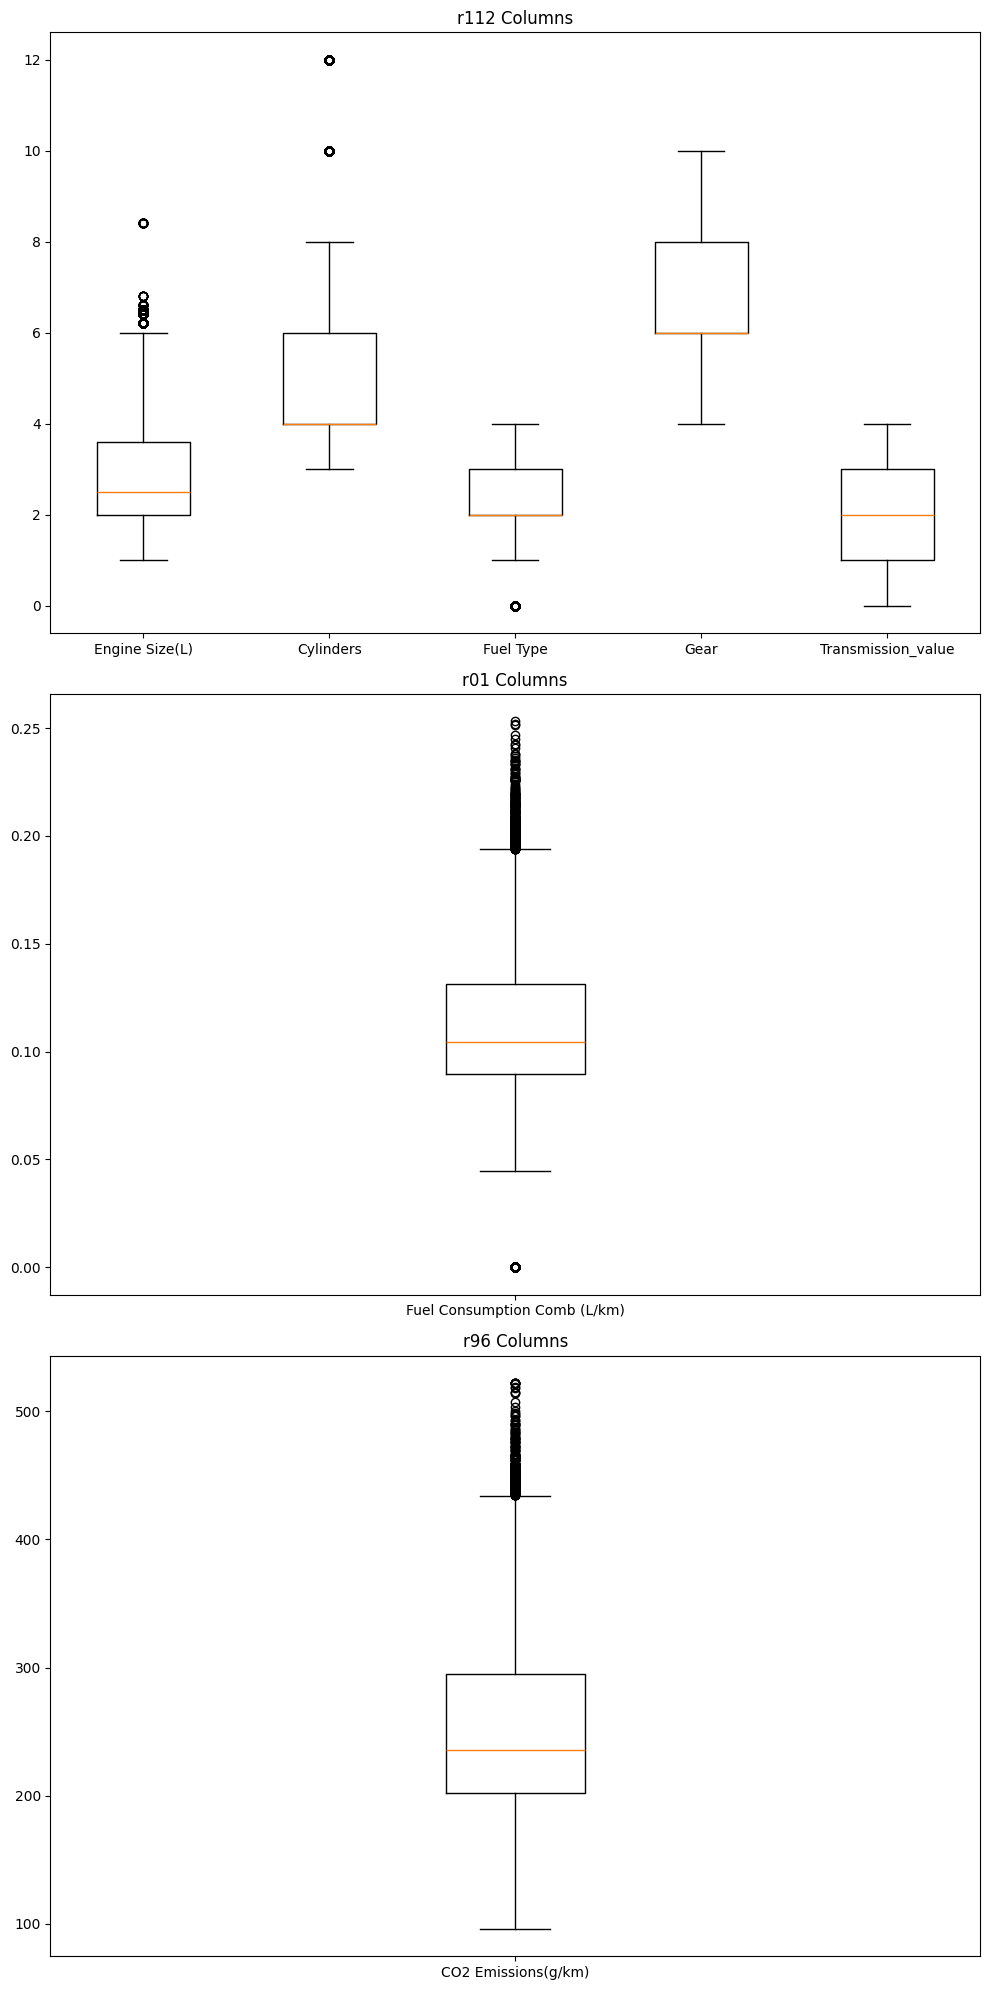

In [283]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

# Plot boxplots for r112 columns
axes[0].boxplot(df13[r112_columns], labels=r112_columns)
axes[0].set_title('r112 Columns')

# Plot boxplots for r01 columns
axes[1].boxplot(df13[r01_columns], labels=r01_columns)
axes[1].set_title('r01 Columns')

# Plot boxplots for r96 columns
axes[2].boxplot(df13[r96_columns], labels=r96_columns)
axes[2].set_title('r96 Columns')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### 2. Range 1-12

In [284]:
df14 = df13.copy()

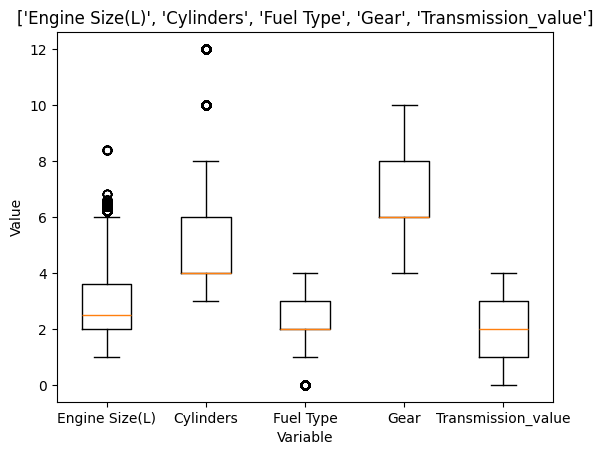

In [285]:
plt.boxplot(df14[r112_columns], labels=r112_columns)
plt.title(r112_columns)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

Cylinders

In [286]:
df15 = df14[~(df14['Cylinders'] > 8)]

In [287]:
#df15[df15['Engine Size(L)'] < 6]

#### 3. Range > 96

In [288]:
df16 = df15.copy()

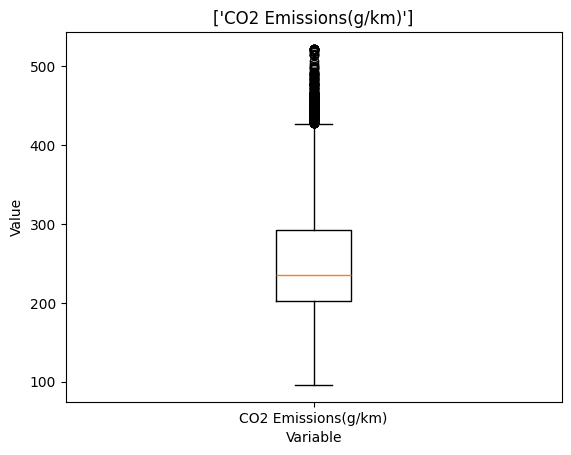

In [289]:
plt.boxplot(df16[r96_columns], labels=r96_columns)
plt.title(r96_columns)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

In [290]:
df16 = df16[~(df16['CO2 Emissions(g/km)'] > 410)]

#### 4. Range 0-1

In [291]:
df17 = df16.copy()

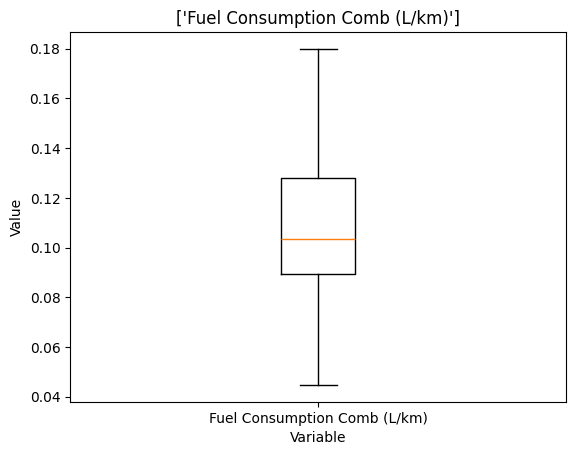

In [292]:
plt.boxplot(df19[r01_columns], labels=r01_columns)
plt.title(r01_columns)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

In [293]:
df18 = df17[df17['Fuel Consumption Comb (L/km)'] != 0]

In [294]:
df19 = df18[df18['Fuel Consumption Comb (L/km)'] < 0.18]

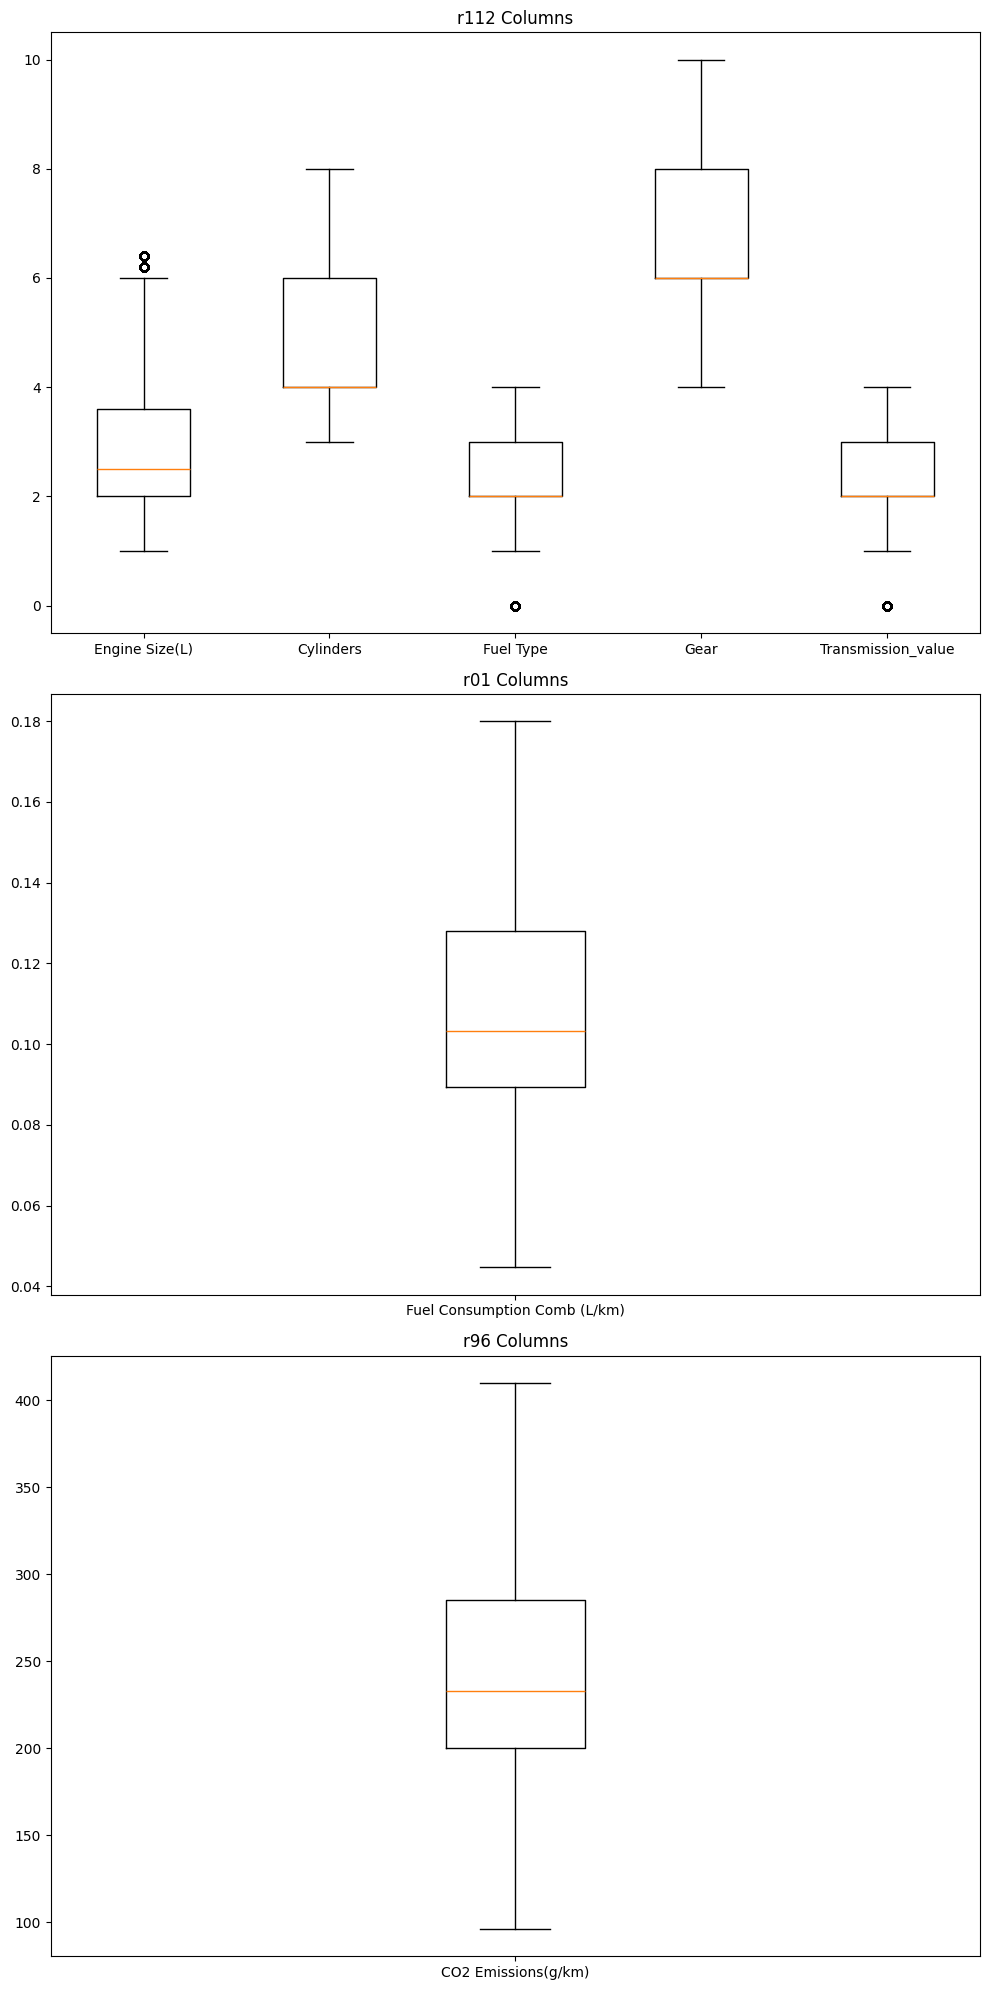

In [303]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 20))

# Plot boxplots for r112 columns
axes[0].boxplot(df19[r112_columns], labels=r112_columns)
axes[0].set_title('r112 Columns')

# Plot boxplots for r01 columns
axes[1].boxplot(df19[r01_columns], labels=r01_columns)
axes[1].set_title('r01 Columns')

# Plot boxplots for r96 columns
axes[2].boxplot(df19[r96_columns], labels=r96_columns)
axes[2].set_title('r96 Columns')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Data sudah dianggap bersih, disimpan dalam df

In [304]:
df19.shape

(34167, 7)

In [305]:
df = df19.copy()

# EDA

array([[<Axes: title={'center': 'Engine Size(L)'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Fuel Type'}>],
       [<Axes: title={'center': 'CO2 Emissions(g/km)'}>,
        <Axes: title={'center': 'Gear'}>,
        <Axes: title={'center': 'Transmission_value'}>],
       [<Axes: title={'center': 'Fuel Consumption Comb (L/km)'}>,
        <Axes: >, <Axes: >]], dtype=object)

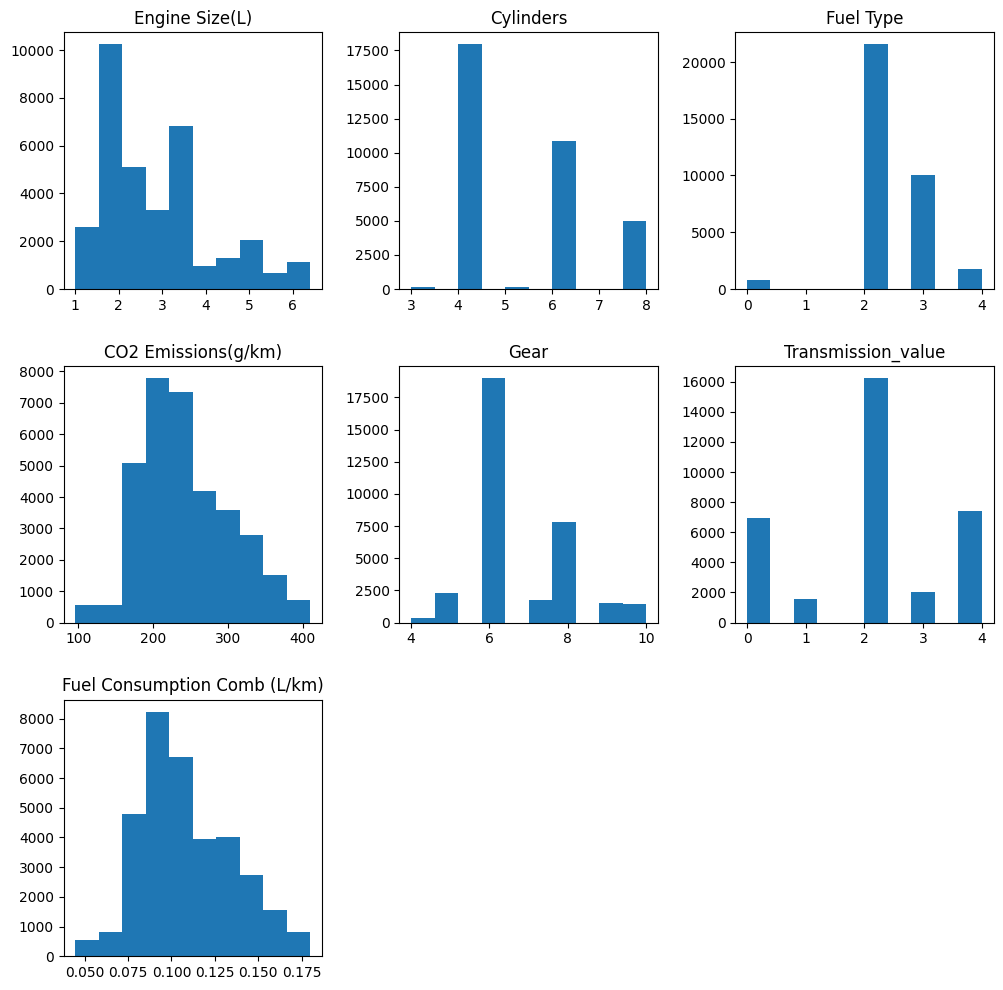

In [306]:
df.hist(grid = False, figsize = (12,12))

In [307]:
import seaborn as sns

<Axes: >

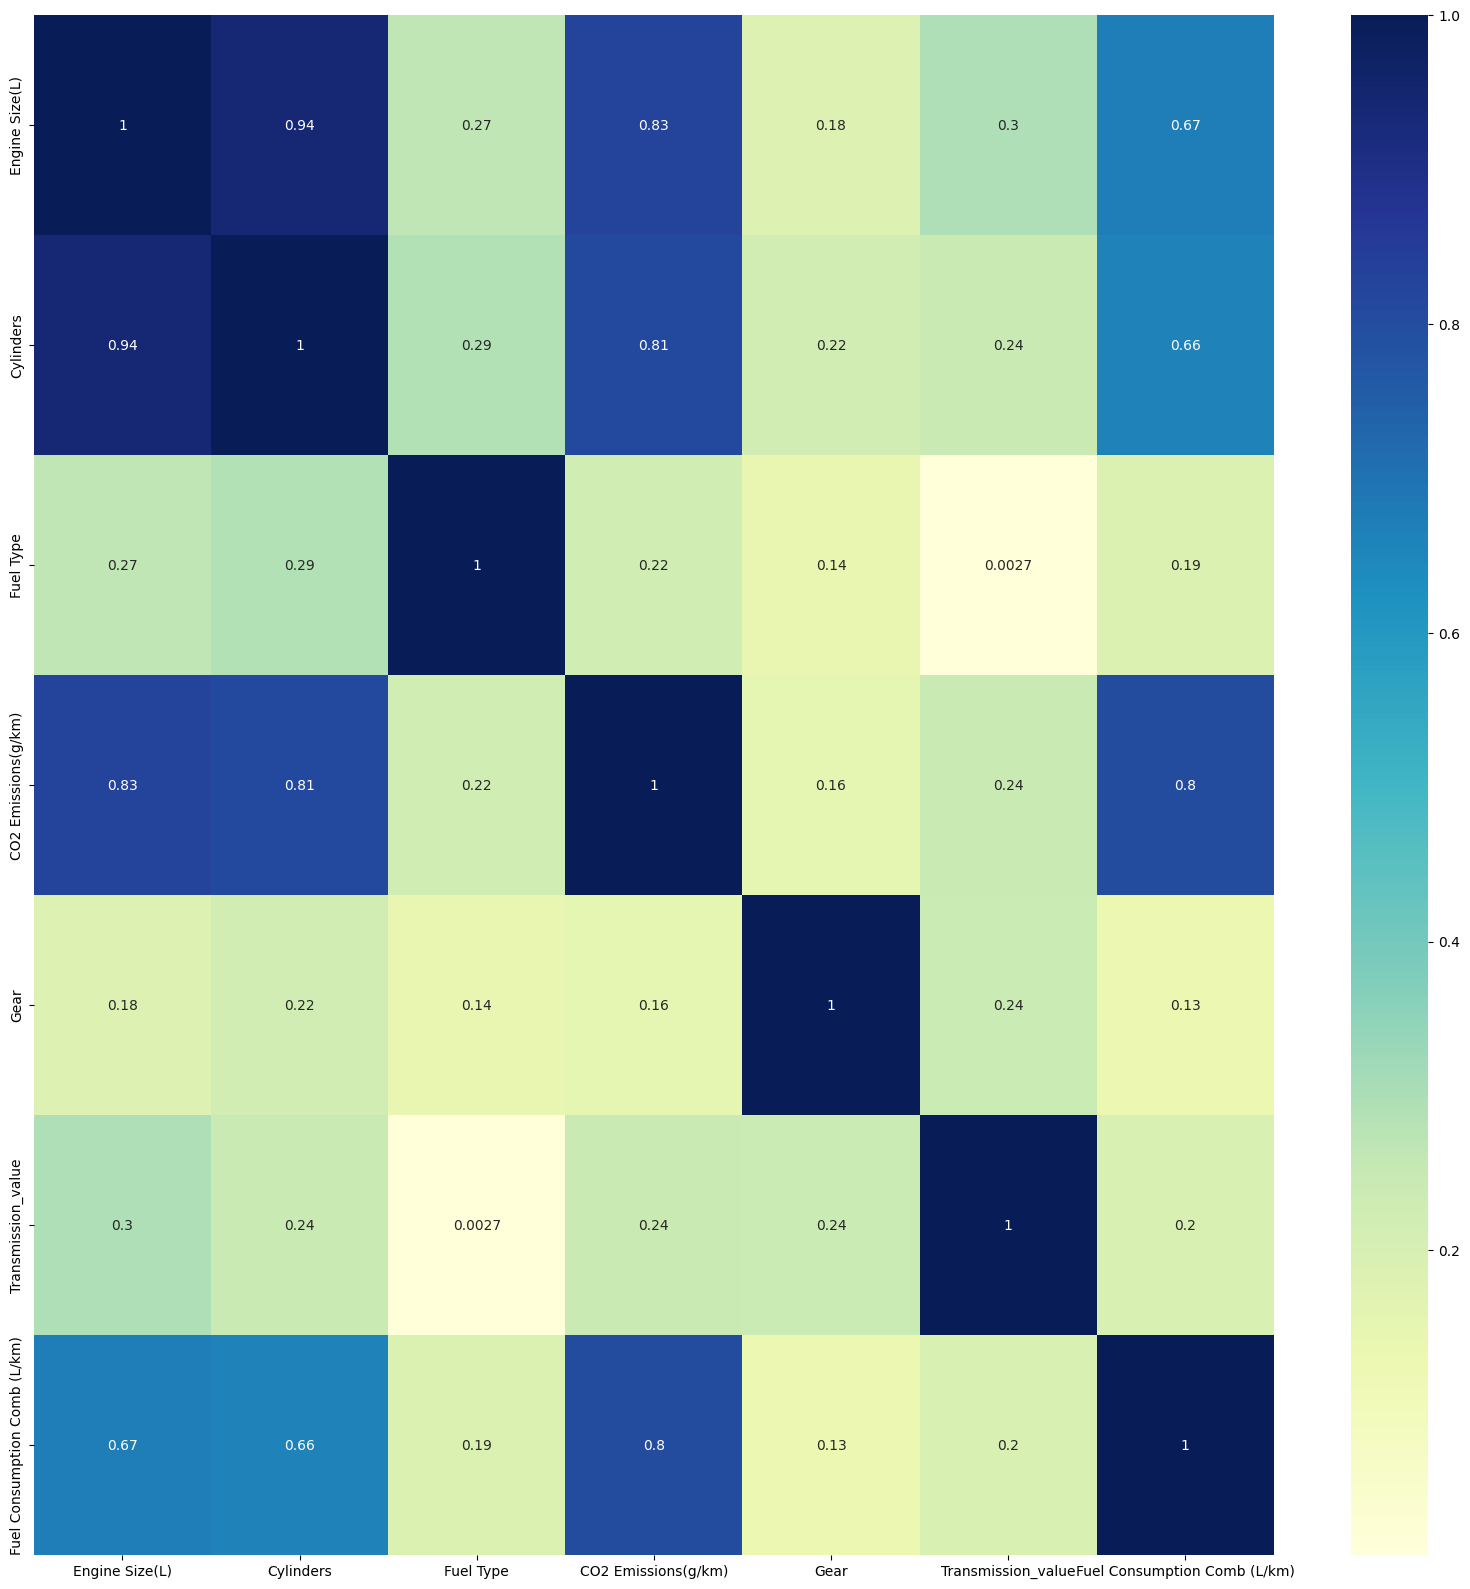

In [308]:
fig, ax = plt.subplots(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")

Feature Selection

In [310]:
X = df.drop(['CO2 Emissions(g/km)'], axis='columns')
y = df['CO2 Emissions(g/km)']

In [311]:
X.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Type', 'Gear',
       'Transmission_value', 'Fuel Consumption Comb (L/km)'],
      dtype='object')

In [312]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

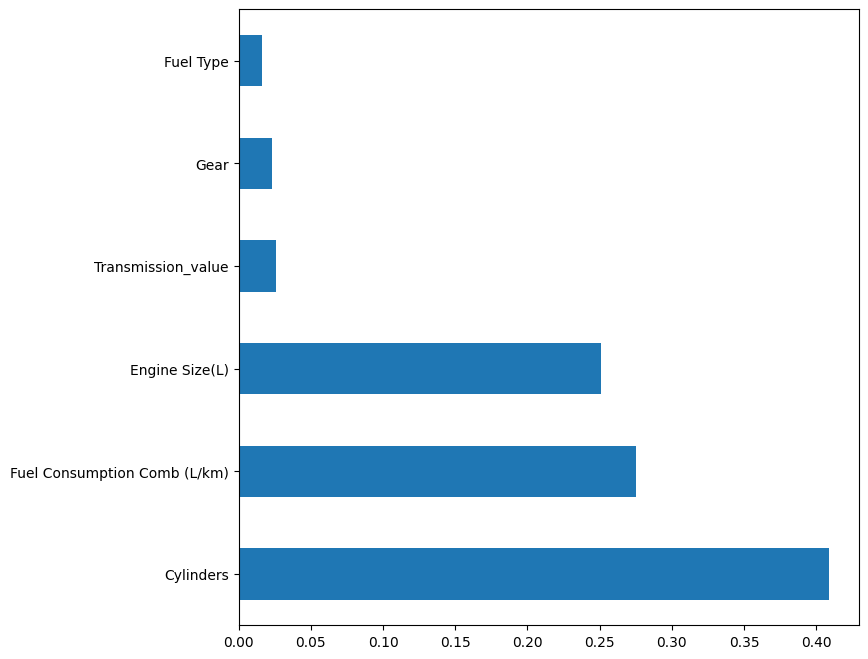

In [313]:
plt.figure(figsize = (8,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

# MODELING


In [314]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Multilinear Regressor

In [355]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [356]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [357]:
from sklearn.metrics import mean_squared_error
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 704.674053436696
R-squared: 0.802735691685245


## Neural Network

In [358]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.27777778 0.2        0.5        0.33333333 0.75       0.29062486]
 [0.27777778 0.4        0.5        0.33333333 0.5        0.40968384]
 [0.62962963 1.         0.75       0.33333333 0.         0.54501847]
 ...
 [0.09259259 0.2        0.75       0.5        0.75       0.24773291]
 [0.18518519 0.2        0.75       0.83333333 0.5        0.4059894 ]
 [0.07407407 0.2        0.5        0.33333333 0.25       0.10868703]]


In [362]:
# Build the neural network model
model = Sequential()
model.add(Dense(76, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(38, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='nadam', loss='mean_squared_error')


In [369]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=300, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10
 1/73 [..............................] - ETA: 0s - loss: 432.6440

73/73 [==============================] - 0s 6ms/step - loss: 608.9637 - val_loss: 602.7697
Epoch 2/10
73/73 [==============================] - 0s 3ms/step - loss: 608.1478 - val_loss: 603.9615
Epoch 3/10
73/73 [==============================] - 0s 4ms/step - loss: 608.0160 - val_loss: 602.9744
Epoch 4/10
73/73 [==============================] - 0s 4ms/step - loss: 607.9964 - val_loss: 603.8544
Epoch 5/10
73/73 [==============================] - 0s 4ms/step - loss: 607.7774 - val_loss: 602.2151
Epoch 6/10
73/73 [==============================] - 0s 4ms/step - loss: 607.5447 - val_loss: 602.3539
Epoch 7/10
73/73 [==============================] - 0s 4ms/step - loss: 608.0490 - val_loss: 601.6453
Epoch 8/10
73/73 [==============================] - 0s 4ms/step - loss: 607.7148 - val_loss: 604.9366
Epoch 9/10
73/73 [==============================] - 0s 4ms/step - loss: 607.8948 - val_loss: 604.9758
Epoch 10/10
214/214 [==============================] - 0s 2ms/step - loss: 600.3929
Test Loss

In [370]:
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [371]:
predictions = model.predict(X_test)

 25/214 [==>...........................] - ETA: 0s

214/214 [==============================] - 1s 3ms/step


In [372]:
print_evaluate(y_test, predictions)

MAE: 18.430681955964378
MSE: 600.3930697782616
RMSE: 24.502919617430525
R2 Square 0.8319277926451696
__________________________________
